# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9382 Рыжих Роман, вариант 32.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при t → +∞.

## Основные теоретические положения

Линейная однородная система с периодическими коэффициентами:

$X'=A(t)X, \quad A(t+T)=A(t), \quad t \geq 0 \quad \quad \quad \quad$     (1)

$\Phi(t)$ - ***фундаментальная матрица*** системы (1), т.е. ее столбцы – линейно независимые решения уравнения (1).

Матрица $C$, удовлетворяющая условию $\Phi(t+T)=\Phi(t)C,$ $\forall t \geq 0$, называется ***основной*** для фундаментальной матрицы $\Phi(t)$

***Спектральным радиусом*** матрицы $A$ называется максимум модуля ее собственных чисел. $\rho(A)=max|\lambda_j|$ $0\leq j\leq n$

## Постановка задачи

Дано дифференциальное уравнение:

$x′′ + a(p, t)x = 0, \quad a(p, t) = p + b(t),\quad b(t + T) = b(t)$,

где p – параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$\begin{cases}
u'_1=u_2 \quad \quad \quad (1)\\
u'_2=-a(p,t)u_1
\end{cases}$


(1)

Здесь $u_1(t) = x(t)$, $u_2(t) = x′(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной
периодической системе, а не только к системе вида (1).

## Выполнение работы

$b(t)=cos^2(t) − sin(t)$

$T = 2\pi$

Интервал неустойчивости:  0.1 0.20000000000000004
Интервал неустойчивости:  1.2000000000000004 1.5500000000000005
Интервал неустойчивости:  3.050000000000001 3.2500000000000013
Интервал неустойчивости:  5.350000000000001 5.450000000000001
Интервал неустойчивости:  8.100000000000003 8.200000000000003


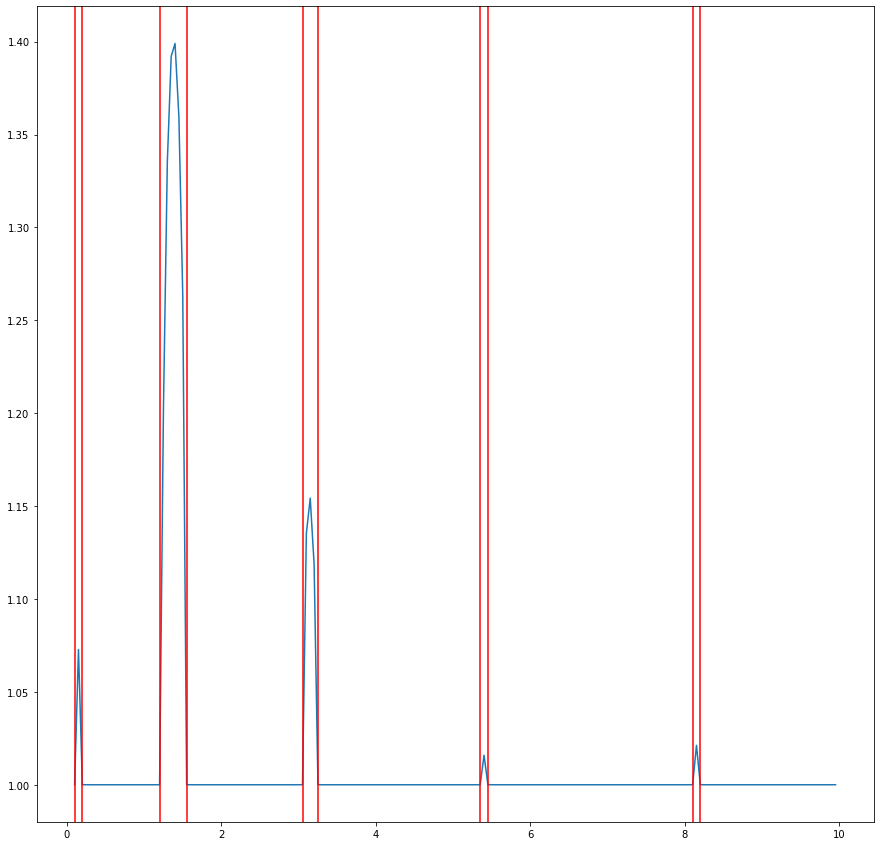

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

p_arr = np.arange(0.1, 10, 0.05)
r_arr = []
v_1 = [1,0]
v_2 = [0,1]
T = 2*math.pi
a_t = np.arange(0, T, 0.001)

for p in p_arr:
    f = lambda x, t: [x[1], -(p + math.fabs(math.cos(t)**2 - math.sin(t)))*x[0]]
    sol_1 = odeint(f, v_1, a_t)
    sol_2 = odeint(f, v_2, a_t)
    C = np.matrix([sol_1[-1], sol_2[-1]]).transpose()
    radius = np.around(np.max(np.abs(np.linalg.eigvals(C))),5)
    r_arr.append(radius)
    
p_0 = []
flag = True
for i in range(len(r_arr)):
    if flag == True and r_arr[i] > 1:
        p_0.append(p_arr[i-1])
        flag = False
    elif flag == False and r_arr[i] <= 1:
        p_0.append(p_arr[i])
        flag = True


plt.plot(p_arr, r_arr, label="r(p)")

for i in range(int(len(p_0)/2)):
    print("Интервал неустойчивости: ", p_0[2*i], p_0[2*i+1])
    plt.axvline(x=p_0[2*i], color='red')
    plt.axvline(x=p_0[2*i+1], color='red')
plt.show()

## Выводы

В ходе выполнения работы при помощи python была изучена устойчивость однородного линейного уравнения с периодическими коэффициентами.